---
# Assignment 2: Data Visualization with Matplotlib
---
## Student Information
```text
Name:  Ahmed Monir Almassri       Student ID: 120220138       Date:  12/25/2025
```

## Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Set style for better looking plots
plt.style.use('seaborn-v0_8')

# Magic command for inline plotting
%matplotlib inline

# Part A: Basic Plotting

### Q1: Trigonometric Functions Plotting
Create a figure with 3 subplots (arranged vertically) showing:
1. Sine function from -2π to 2π with 200 samples
2. Cosine function from -2π to 2π with 200 samples  
3. Tangent function from -2π to 2π with 200 samples

**Requirements:**
- Each subplot should have proper titles and axis labels
- Use different colors for each function
- Add gridlines to all plots
- Set appropriate x-axis ticks at -2π, -π, 0, π, 2π

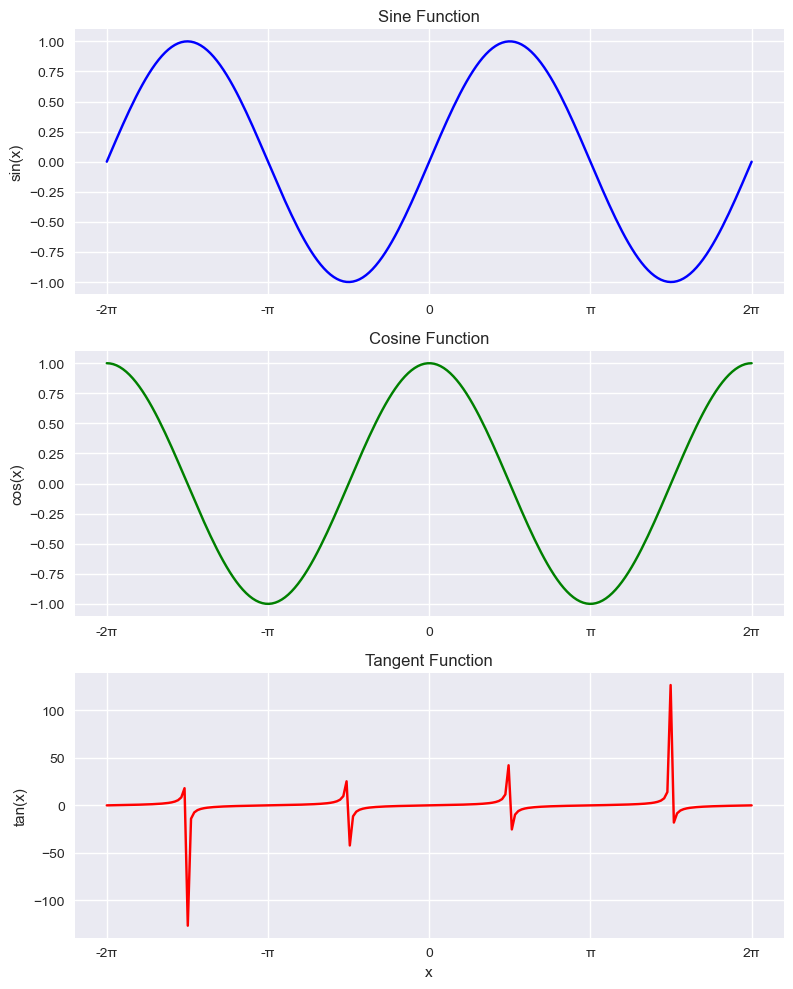

In [2]:
# Step 1: Create x values from -2π to 2π
x = np.linspace(-2 * np.pi, 2 * np.pi, 200)

# Step 2: Calculate y values for sin, cos, tan
y_sin = np.sin(x)
y_cos = np.cos(x)
y_tan = np.tan(x)

# Step 3: Create figure with 3 subplots (vertical arrangement)
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

# Step 4: Plot sine function
axes[0].plot(x, y_sin, color='blue')
axes[0].set_title('Sine Function')
axes[0].set_ylabel('sin(x)')
axes[0].grid(True)

# Step 5: Plot cosine function
axes[1].plot(x, y_cos, color='green')
axes[1].set_title('Cosine Function')
axes[1].set_ylabel('cos(x)')
axes[1].grid(True)

# Step 6: Plot tangent function
axes[2].plot(x, y_tan, color='red')
axes[2].set_title('Tangent Function')
axes[2].set_ylabel('tan(x)')
axes[2].set_xlabel('x')
axes[2].grid(True)

# Step 7: Add custom x-ticks
ticks = [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]
tick_labels = ['-2π', '-π', '0', 'π', '2π']

for ax in axes:
    ax.set_xticks(ticks)
    ax.set_xticklabels(tick_labels)

# Step 8: Adjust layout and display
plt.tight_layout()
plt.show()

### Q2: Multi-resolution Comparison
Plot the sine function in a 2×2 subplot grid with different sample resolutions:
1. Top-left: 10 samples
2. Top-right: 50 samples
3. Bottom-left: 100 samples
4. Bottom-right: 500 samples

Show how increasing samples improves the smoothness of the curve.

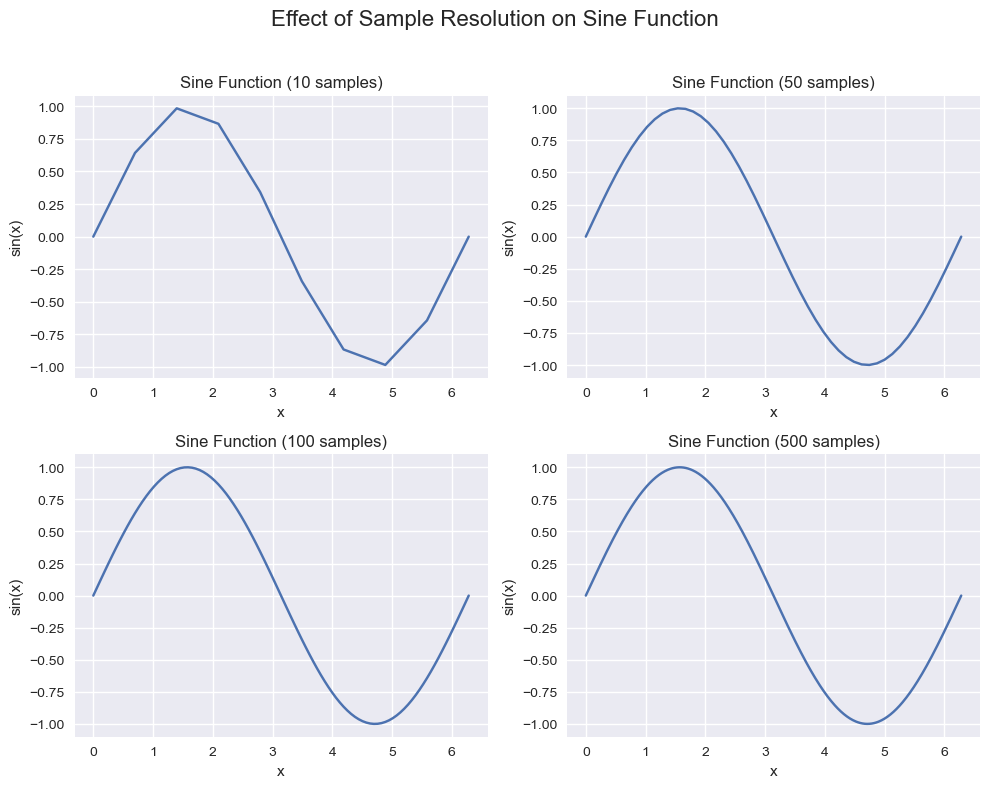

In [ ]:
# Step 1: Define different sample sizes
samples_list = [10, 50, 100, 500]

# Step 2: Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten axes array for easy looping
axes = axes.flatten()
# axes = [ax0, ax1, ax2, ax3]


# Step 3: Loop through each sample size and plot
for ax, samples in zip(axes, samples_list):
    x = np.linspace(0, 2 * np.pi, samples)
    y = np.sin(x)
    # ax may be axes[0] or axes[1] or axes[2] or axes[3]
    # samples is the number of points -- may be 10 , 50 , 100 , 500
    # x is the points between 0 , 2pi
    ax.plot(x, y)
    ax.set_title(f"Sine Function ({samples} samples)")
    ax.set_xlabel("x")
    ax.set_ylabel("sin(x)")
    ax.grid(True)

# Step 5: Add super title and adjust layout
fig.suptitle("Effect of Sample Resolution on Sine Function", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Q3: Custom Bar Chart
Create a bar chart showing the grades distribution of a class:
- Grades: A, B, C, D, F
- Number of students: [8, 12, 15, 5, 2]

**Requirements:**
- Use different colors for each grade
- Add value labels on top of each bar
- Add a title "Grade Distribution - Class A"
- Set y-axis label to "Number of Students"

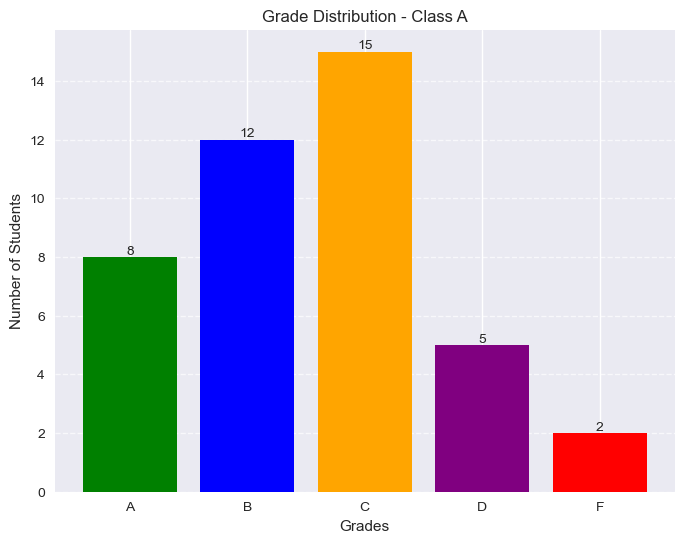

In [12]:
# Your solution for Q3 here

# Step 1: Define data
grades = ['A', 'B', 'C', 'D', 'F']
students = [8, 12, 15, 5, 2]

# Step 2: Define colors for each bar
colors = ['green', 'blue', 'orange', 'purple', 'red']

# Step 3: Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(grades, students, color=colors)

# Step 4: Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(height),
        ha='center',
        va='bottom'
    )

# Step 5: Add title and labels
plt.title("Grade Distribution - Class A")
plt.ylabel("Number of Students")
plt.xlabel("Grades")

# Step 6: Customize appearance
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Part B: Data Analysis & Visualization

### Q4: COVID-19 Data Analysis
Load the files `covid_gaza_data.npy` and `covid_gaza_date.npy` and:

1. Create a 2×2 subplot showing:
   - Top-left: Daily cases (line plot)
   - Top-right: Daily deaths (line plot) 
   - Bottom-left: Daily recoveries (line plot)
   - Bottom-right: Active cases (line plot)

2. Calculate and plot:
   - 7-day moving average of new cases
   - Daily growth rate percentage

**Note:** The data has 4 columns: [Cases, Deaths, Recoveries, Active Cases]

COVID data shape: (300, 4)
Dates shape: (300,)


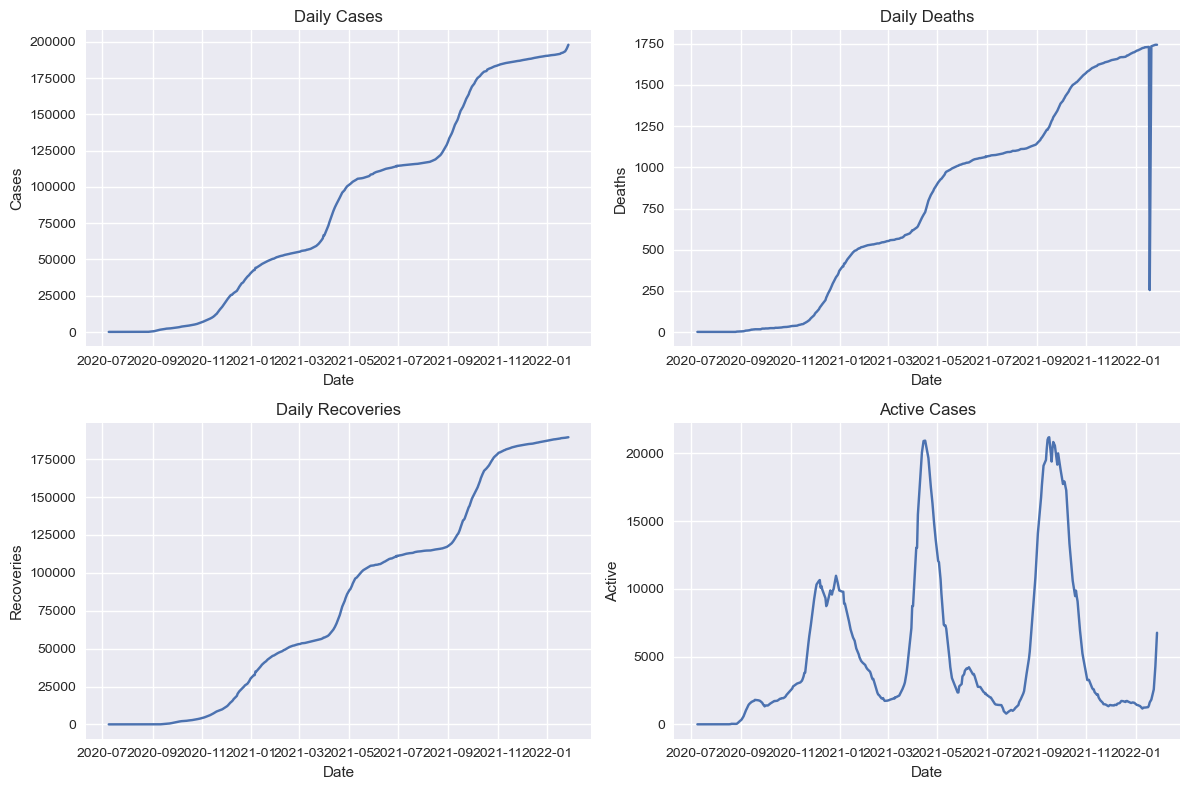

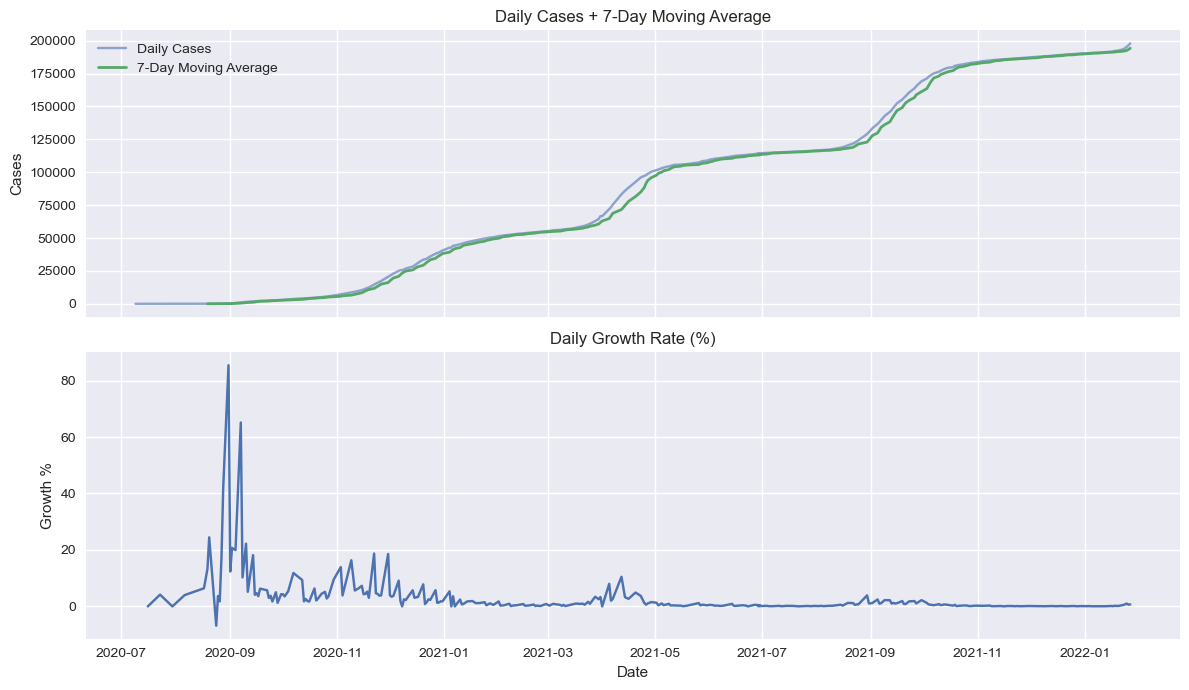

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data files
try:
    covid_data = np.load('covid_gaza_data.npy')
    covid_dates = np.load('covid_gaza_date.npy')
    print(f"COVID data shape: {covid_data.shape}")
    print(f"Dates shape: {covid_dates.shape}")
except FileNotFoundError as e:
    print(f"Error: {e}")
    # Create sample data for testing
    covid_data = np.random.rand(100, 4) * 100
    covid_dates = np.arange(100)

# ---- Helpers: make dates usable on x-axis ----
# If dates are stored as strings/bytes, convert to string for plotting
if covid_dates.dtype.kind in ("S", "U", "O"):
    dates_x = covid_dates.astype(str)
else:
    dates_x = covid_dates  # could be numeric (e.g., day index)

# Extract columns: [Cases, Deaths, Recoveries, Active Cases]
cases = covid_data[:, 0]
deaths = covid_data[:, 1]
recoveries = covid_data[:, 2]
active = covid_data[:, 3]

# Step 2: Create 2x2 subplot for basic metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(dates_x, cases)
axes[0, 0].set_title("Daily Cases")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Cases")
axes[0, 0].grid(True)

axes[0, 1].plot(dates_x, deaths)
axes[0, 1].set_title("Daily Deaths")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Deaths")
axes[0, 1].grid(True)

axes[1, 0].plot(dates_x, recoveries)
axes[1, 0].set_title("Daily Recoveries")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Recoveries")
axes[1, 0].grid(True)

axes[1, 1].plot(dates_x, active)
axes[1, 1].set_title("Active Cases")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Active")
axes[1, 1].grid(True)

# If dates are many (strings), reduce tick density to avoid clutter
if isinstance(dates_x[0], str) and len(dates_x) > 20:
    step = max(1, len(dates_x)//10)
    for ax in axes.ravel():
        ax.set_xticks(np.arange(0, len(dates_x), step))
        ax.set_xticklabels(dates_x[::step], rotation=45, ha="right")

plt.tight_layout()
plt.show()

# Step 3: Calculate 7-day moving average (new cases)
# Using convolution; output same length by padding with NaN at start
window = 7
kernel = np.ones(window) / window
ma7_valid = np.convolve(cases, kernel, mode="valid")
ma7 = np.concatenate([np.full(window-1, np.nan), ma7_valid])

# Step 4: Calculate daily growth rate (%)
# growth[t] = (cases[t] - cases[t-1]) / cases[t-1] * 100
growth = np.full_like(cases, np.nan, dtype=float)
prev = cases[:-1]
diff = cases[1:] - cases[:-1]

# Avoid division by zero: where prev == 0 -> keep NaN
nonzero_mask = prev != 0
growth[1:][nonzero_mask] = (diff[nonzero_mask] / prev[nonzero_mask]) * 100

# Step 5: Plot moving average and growth rate
fig2, ax2 = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

ax2[0].plot(dates_x, cases, label="Daily Cases", alpha=0.6)
ax2[0].plot(dates_x, ma7, label="7-Day Moving Average", linewidth=2)
ax2[0].set_title("Daily Cases + 7-Day Moving Average")
ax2[0].set_ylabel("Cases")
ax2[0].grid(True)
ax2[0].legend()

ax2[1].plot(dates_x, growth)
ax2[1].set_title("Daily Growth Rate (%)")
ax2[1].set_xlabel("Date")
ax2[1].set_ylabel("Growth %")
ax2[1].grid(True)

# Ticks formatting again if string dates
if isinstance(dates_x[0], str) and len(dates_x) > 20:
    step = max(1, len(dates_x)//10)
    ax2[1].set_xticks(np.arange(0, len(dates_x), step))
    ax2[1].set_xticklabels(dates_x[::step], rotation=45, ha="right")

plt.tight_layout()
plt.show()


### Q5: New Cases Analysis
Calculate the number of new cases each day from the cumulative cases and:

1. Plot daily new cases as a bar chart
2. Plot weekly new cases (sum of each 7 days) as a bar chart
3. Identify and mark the peak day of new cases

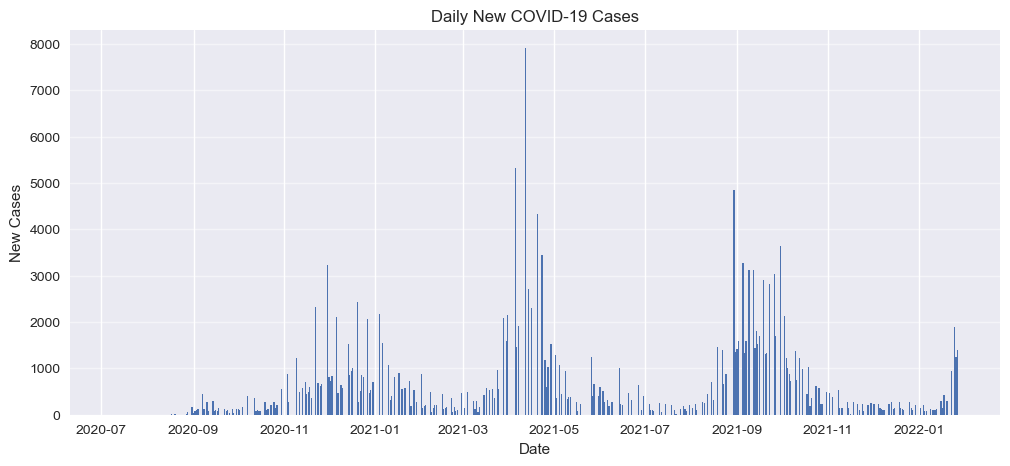

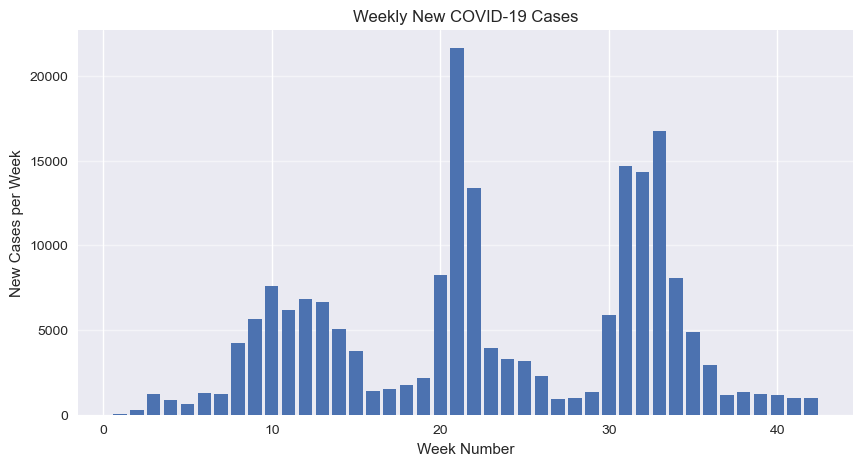

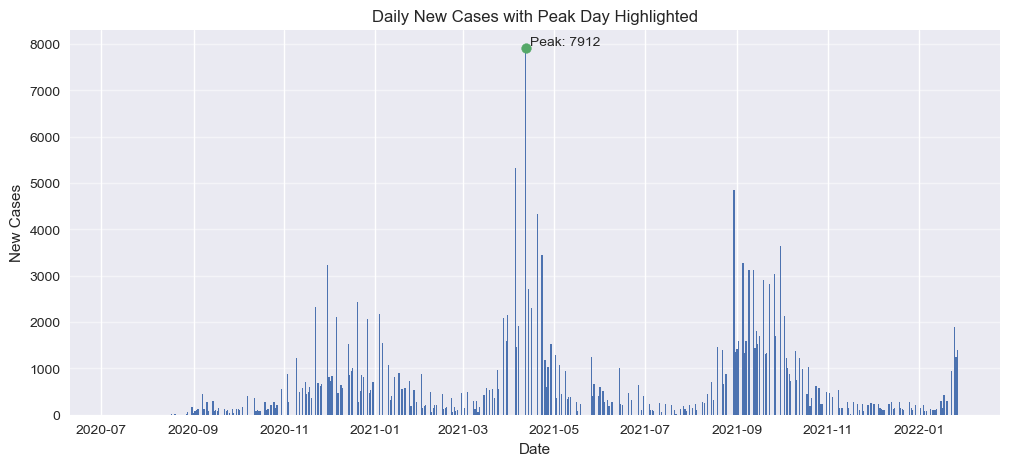

In [14]:
# Step 1: Extract cumulative cases
cumulative_cases = covid_data[:, 0]  # First column

# Step 2: Calculate daily new cases
# new_cases[t] = cumulative[t] - cumulative[t-1]
daily_new_cases = np.diff(cumulative_cases, prepend=cumulative_cases[0])

# Ensure no negative values (in case of noisy data)
daily_new_cases = np.maximum(daily_new_cases, 0)

# Step 3: Plot daily new cases as bar chart
plt.figure(figsize=(12, 5))
plt.bar(covid_dates, daily_new_cases)
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(axis='y', alpha=0.5)
plt.show()

# Step 4: Calculate weekly new cases (sum of each 7 days)
weeks = len(daily_new_cases) // 7
weekly_new_cases = daily_new_cases[:weeks * 7].reshape(weeks, 7).sum(axis=1)

# Step 5: Plot weekly new cases
plt.figure(figsize=(10, 5))
plt.bar(range(1, weeks + 1), weekly_new_cases)
plt.title("Weekly New COVID-19 Cases")
plt.xlabel("Week Number")
plt.ylabel("New Cases per Week")
plt.grid(axis='y', alpha=0.5)
plt.show()

# Step 6: Identify and mark peak day
peak_index = np.argmax(daily_new_cases)
peak_value = daily_new_cases[peak_index]
peak_date = covid_dates[peak_index]

plt.figure(figsize=(12, 5))
plt.bar(covid_dates, daily_new_cases)
plt.scatter(peak_date, peak_value, zorder=5)
plt.text(
    peak_date,
    peak_value,
    f" Peak: {int(peak_value)}",
    ha='left',
    va='bottom'
)
plt.title("Daily New Cases with Peak Day Highlighted")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(axis='y', alpha=0.5)
plt.show()

### Q6: Statistical Visualization
For the COVID-19 data, create:

1. A pie chart showing the proportion of:
   - Total Cases
   - Total Deaths  
   - Total Recoveries
   - Active Cases (at the end of the period)

2. A scatter plot with:
   - X-axis: Daily new cases
   - Y-axis: Daily new deaths
   - Point size: Based on active cases
   - Color: Based on day number (use a colormap)

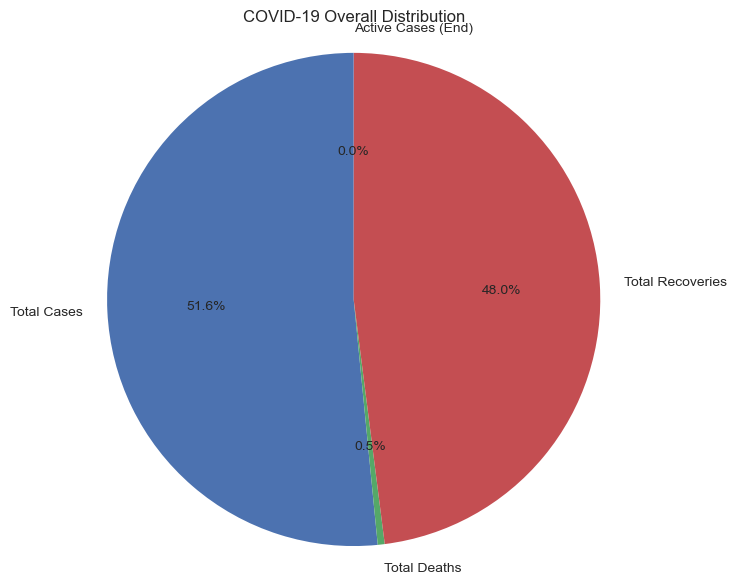

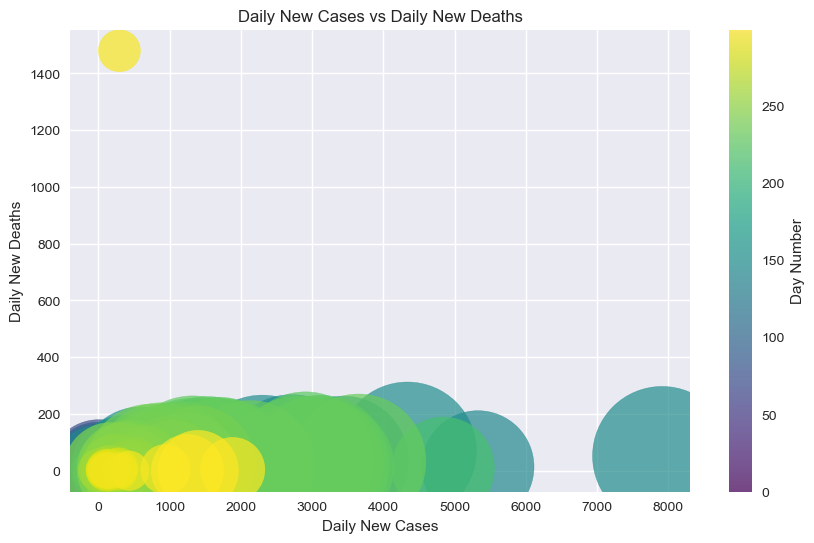

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate totals for pie chart
total_cases = np.sum(covid_data[:, 0])
total_deaths = np.sum(covid_data[:, 1])
total_recoveries = np.sum(covid_data[:, 2])
active_cases_end = covid_data[-1, 3]

pie_values = [
    total_cases,
    total_deaths,
    total_recoveries,
    active_cases_end
]

pie_labels = [
    "Total Cases",
    "Total Deaths",
    "Total Recoveries",
    "Active Cases (End)"
]

# Step 2: Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    pie_values,
    labels=pie_labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("COVID-19 Overall Distribution")
plt.axis('equal')  # Make pie circular
plt.show()

# Step 3: Calculate daily new cases and daily new deaths
daily_new_cases = np.diff(covid_data[:, 0], prepend=covid_data[0, 0])
daily_new_deaths = np.diff(covid_data[:, 1], prepend=covid_data[0, 1])

# Remove negative values if any
daily_new_cases = np.maximum(daily_new_cases, 0)
daily_new_deaths = np.maximum(daily_new_deaths, 0)

# Step 4: Prepare scatter plot variables
x = daily_new_cases
y = daily_new_deaths
sizes = covid_data[:, 3] * 0.5   # Active cases control point size
colors = np.arange(len(x))       # Day index for color mapping

# Step 5: Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x,
    y,
    s=sizes,
    c=colors,
    cmap='viridis',
    alpha=0.7
)

plt.colorbar(scatter, label="Day Number")
plt.title("Daily New Cases vs Daily New Deaths")
plt.xlabel("Daily New Cases")
plt.ylabel("Daily New Deaths")
plt.grid(True)
plt.show()

# Part C: Advanced Visualization

### Q7: Matrix Visualization
Create a 10×10 matrix where:
- Diagonal elements = 1
- Elements adjacent to diagonal = 0.5  
- All other elements = 0.1

Visualize this matrix using:
1. `plt.matshow()` with a colorbar
2. `plt.imshow()` with interpolation='nearest'
3. A heatmap with annotated values for the first 3×3 corner

<Figure size 500x500 with 0 Axes>

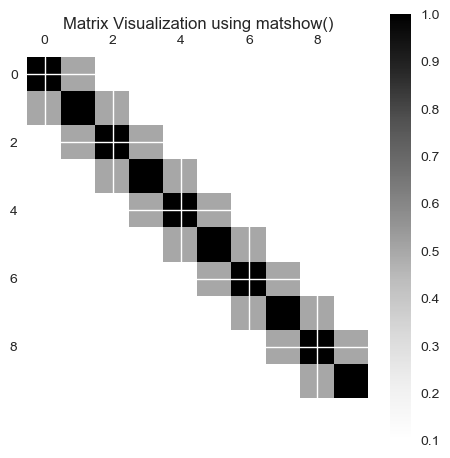

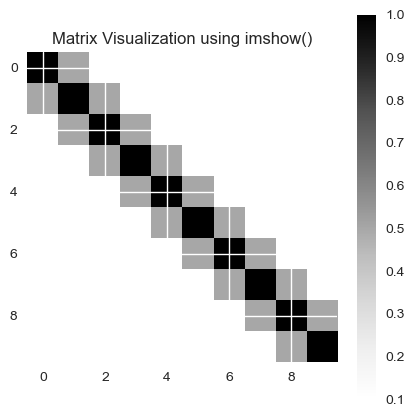

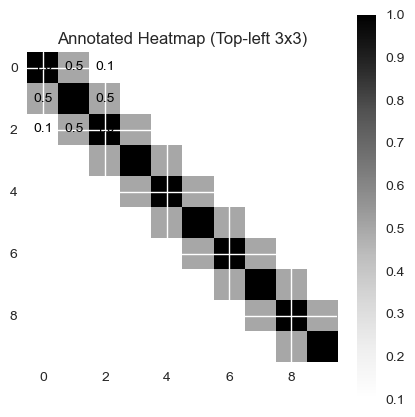

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the 10x10 matrix
size = 10
matrix = np.full((size, size), 0.1)

for i in range(size):
    matrix[i, i] = 1.0
    if i > 0:
        matrix[i, i - 1] = 0.5
    if i < size - 1:
        matrix[i, i + 1] = 0.5

# Step 2: Method 1 - Using plt.matshow()
plt.figure(figsize=(5, 5))
plt.matshow(matrix)
plt.colorbar()
plt.title("Matrix Visualization using matshow()", pad=20)
plt.show()

# Step 3: Method 2 - Using plt.imshow() with interpolation='nearest'
plt.figure(figsize=(5, 5))
plt.imshow(matrix, interpolation='nearest')
plt.colorbar()
plt.title("Matrix Visualization using imshow()")
plt.show()

# Step 4: Method 3 - Heatmap with annotations (first 3x3 corner)
plt.figure(figsize=(5, 5))
plt.imshow(matrix, interpolation='nearest')
plt.colorbar()
plt.title("Annotated Heatmap (Top-left 3x3)")

for i in range(3):
    for j in range(3):
        plt.text(
            j, i,
            matrix[i, j],
            ha='center',
            va='center',
            color='black'
        )

plt.show()

### Q8: Website Visitors Analysis
Load `visitors.npy` and:

1. Reshape the data to show weekly patterns (weeks × days)
2. Create a heatmap showing visitors per day of week
3. Calculate and plot:
   - Average visitors per day of week
   - Total visitors per week
   - Identify the busiest day and week

Visitors data shape: (91,)


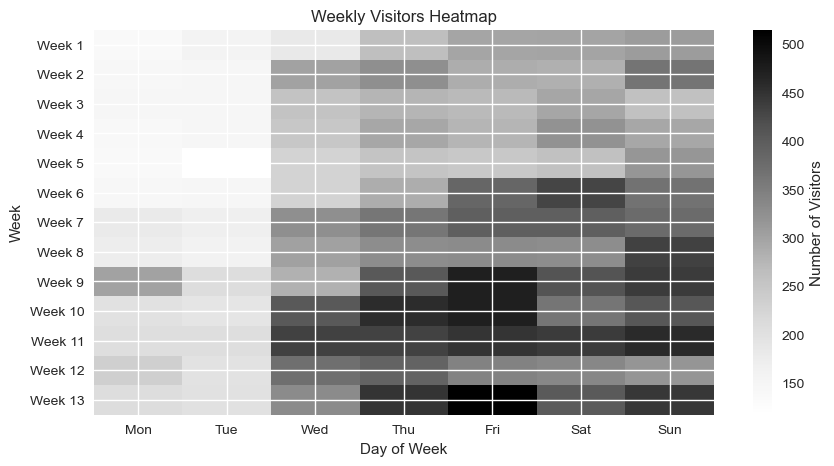

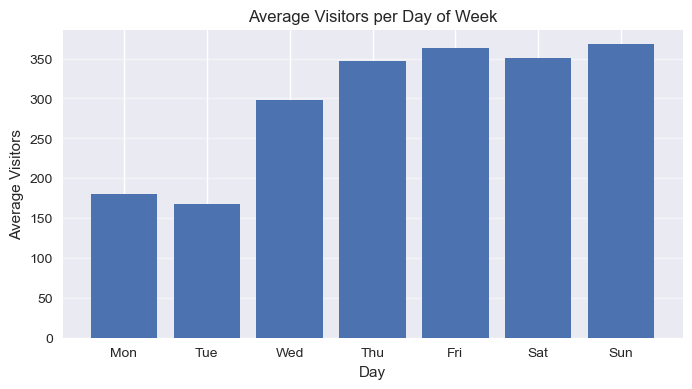

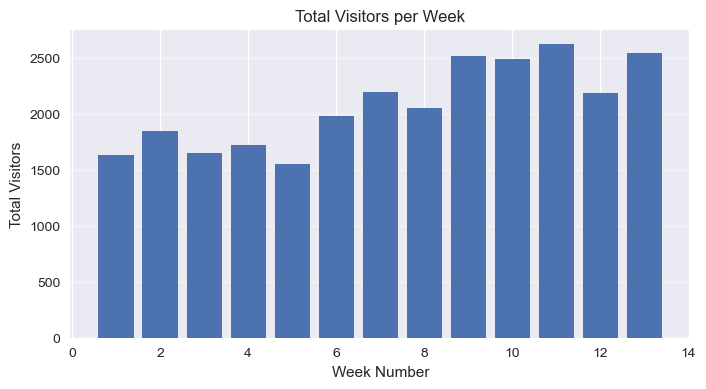

Busiest day of the week (on average): Sun
Busiest week overall: Week 11


In [17]:
# Step 1: Load visitors data
try:
    visitors = np.load('visitors.npy')
    print(f"Visitors data shape: {visitors.shape}")
except FileNotFoundError:
    # Create sample data (13 weeks × 7 days = 91)
    visitors = np.random.randint(50, 500, 91)

# Step 2: Reshape to weekly format (weeks × days)
weeks = visitors.size // 7
weekly_visitors = visitors[:weeks * 7].reshape(weeks, 7)

# Day labels
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Step 3: Create heatmap (visitors per day of week)
plt.figure(figsize=(10, 5))
plt.imshow(weekly_visitors, aspect='auto')
plt.colorbar(label='Number of Visitors')
plt.xticks(range(7), days)
plt.yticks(range(weeks), [f"Week {i+1}" for i in range(weeks)])
plt.title("Weekly Visitors Heatmap")
plt.xlabel("Day of Week")
plt.ylabel("Week")
plt.show()

# Step 4: Calculate and plot average visitors per day of week
avg_per_day = weekly_visitors.mean(axis=0)

plt.figure(figsize=(8, 4))
plt.bar(days, avg_per_day)
plt.title("Average Visitors per Day of Week")
plt.xlabel("Day")
plt.ylabel("Average Visitors")
plt.grid(axis='y', alpha=0.5)
plt.show()

# Step 5: Calculate and plot total visitors per week
total_per_week = weekly_visitors.sum(axis=1)

plt.figure(figsize=(8, 4))
plt.bar(range(1, weeks + 1), total_per_week)
plt.title("Total Visitors per Week")
plt.xlabel("Week Number")
plt.ylabel("Total Visitors")
plt.grid(axis='y', alpha=0.5)
plt.show()

# Step 6: Identify busiest day and week
busiest_day_index = np.argmax(avg_per_day)
busiest_week_index = np.argmax(total_per_week)

busiest_day = days[busiest_day_index]
busiest_week = busiest_week_index + 1

print(f"Busiest day of the week (on average): {busiest_day}")
print(f"Busiest week overall: Week {busiest_week}")

### Q9: Composite Visualization
Create a dashboard-style figure with:

1. **Top-left:** Line plot of sine and cosine functions (0 to 4π)
2. **Top-right:** Scatter plot of random data with size and color variations
3. **Bottom-left:** Bar chart comparing function values at key points (0, π/2, π, 3π/2, 2π)
4. **Bottom-right:** Pie chart showing the quadrant distribution of 1000 random points

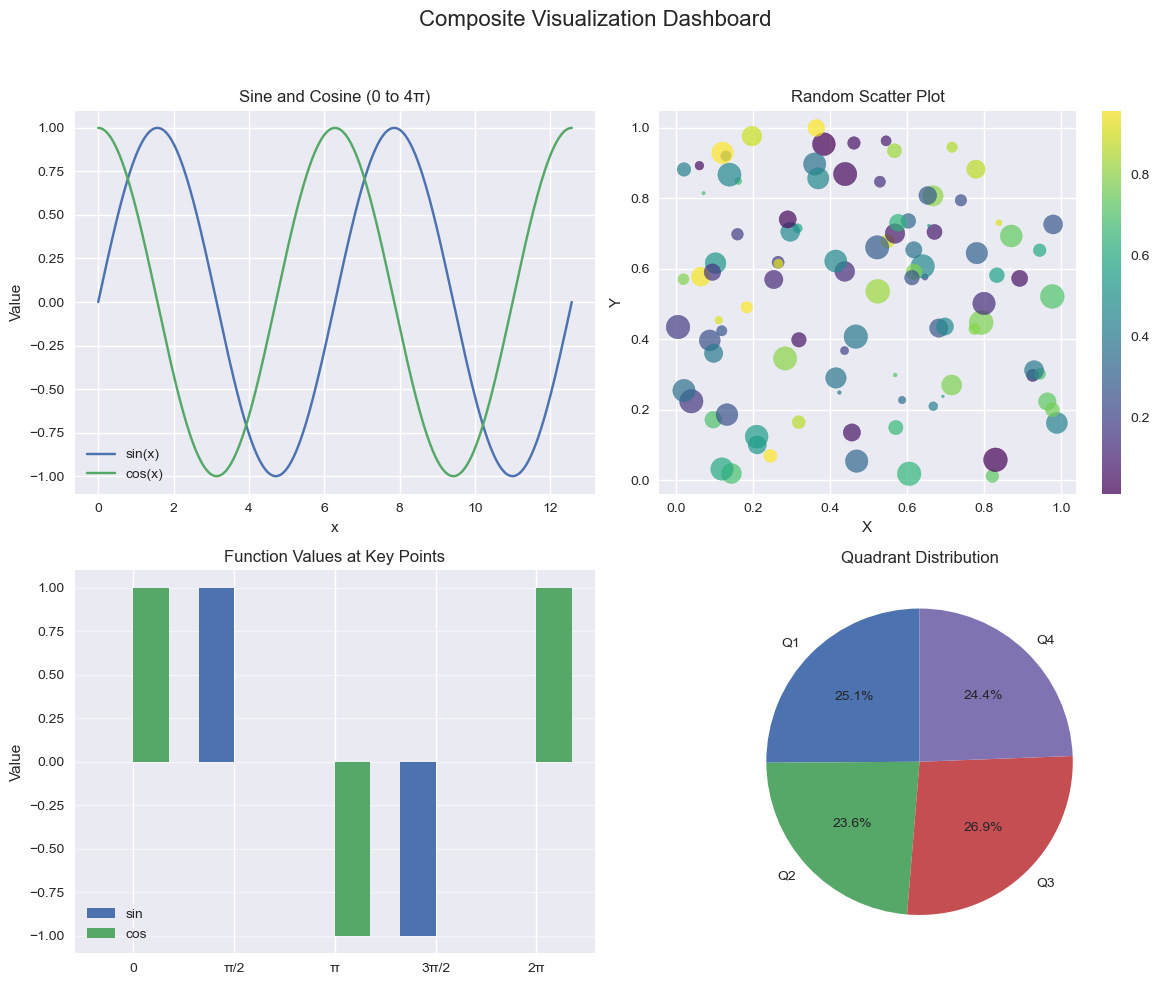

In [18]:

# Step 1: Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# -------------------------------------------------
# Step 2: Top-left - Sine and Cosine functions
x = np.linspace(0, 4 * np.pi, 400)
axes[0, 0].plot(x, np.sin(x), label='sin(x)')
axes[0, 0].plot(x, np.cos(x), label='cos(x)')
axes[0, 0].set_title("Sine and Cosine (0 to 4π)")
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("Value")
axes[0, 0].grid(True)
axes[0, 0].legend()

# -------------------------------------------------
# Step 3: Top-right - Scatter plot with random data
np.random.seed(0)
x_rand = np.random.rand(100)
y_rand = np.random.rand(100)
sizes = np.random.rand(100) * 300
colors = np.random.rand(100)

scatter = axes[0, 1].scatter(
    x_rand, y_rand,
    s=sizes,
    c=colors,
    cmap='viridis',
    alpha=0.7
)
axes[0, 1].set_title("Random Scatter Plot")
axes[0, 1].set_xlabel("X")
axes[0, 1].set_ylabel("Y")
fig.colorbar(scatter, ax=axes[0, 1])

# -------------------------------------------------
# Step 4: Bottom-left - Bar chart at key points
points = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
labels = ['0', 'π/2', 'π', '3π/2', '2π']
sin_vals = np.sin(points)
cos_vals = np.cos(points)

width = 0.35
x_pos = np.arange(len(points))

axes[1, 0].bar(x_pos - width/2, sin_vals, width, label='sin')
axes[1, 0].bar(x_pos + width/2, cos_vals, width, label='cos')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(labels)
axes[1, 0].set_title("Function Values at Key Points")
axes[1, 0].set_ylabel("Value")
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.5)

# -------------------------------------------------
# Step 5: Bottom-right - Pie chart of quadrant distribution
points_rand = np.random.randn(1000, 2)
xq = points_rand[:, 0]
yq = points_rand[:, 1]

q1 = np.sum((xq > 0) & (yq > 0))
q2 = np.sum((xq < 0) & (yq > 0))
q3 = np.sum((xq < 0) & (yq < 0))
q4 = np.sum((xq > 0) & (yq < 0))

quadrant_counts = [q1, q2, q3, q4]
quadrant_labels = ['Q1', 'Q2', 'Q3', 'Q4']

axes[1, 1].pie(
    quadrant_counts,
    labels=quadrant_labels,
    autopct='%1.1f%%',
    startangle=90
)
axes[1, 1].set_title("Quadrant Distribution")

# -------------------------------------------------
# Step 6: Adjust layout and add super title
fig.suptitle("Composite Visualization Dashboard", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Q10: Visualization Task
Create an informative visualization about student performance with:

1. **Input Data:**
   ```python
   students = ['Ali', 'Sara', 'Omar', 'Layla', 'Youssef', 'Noura']
   math_scores = [85, 92, 78, 95, 88, 90]
   science_scores = [88, 94, 82, 96, 85, 92]
   english_scores = [82, 90, 76, 93, 87, 89]
   attendance = [95, 98, 92, 99, 96, 97]
   ```

2. **Requirements:**
   - A radar chart showing each student's performance in all subjects
   - A grouped bar chart comparing subjects across students
   - A scatter plot showing correlation between attendance and average score
   - A composite visualization of your choice that tells a story about the data

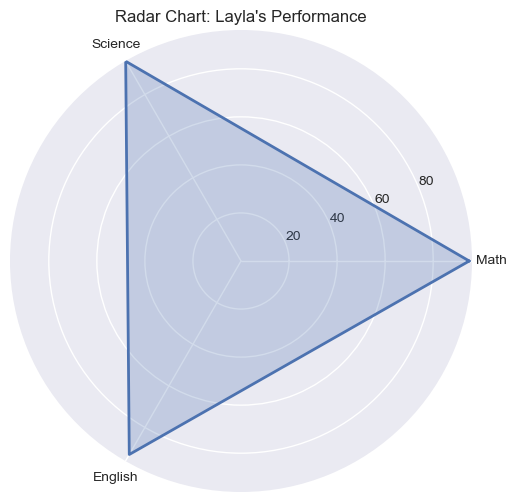

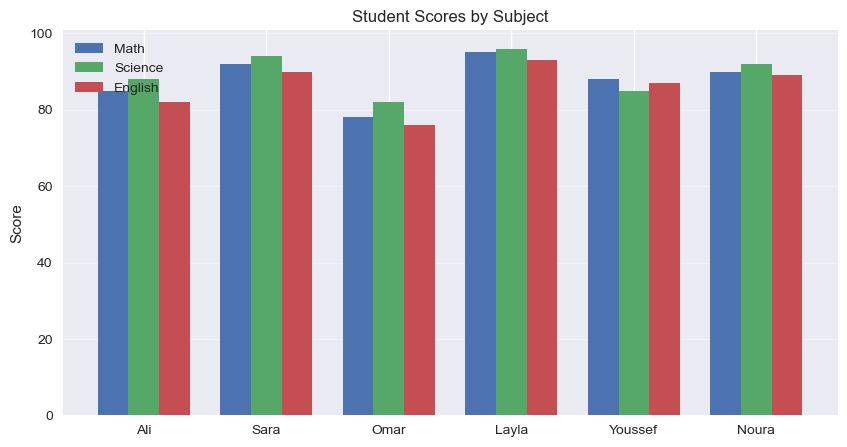

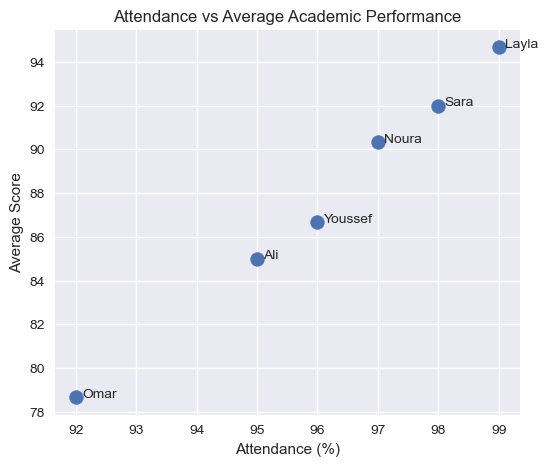

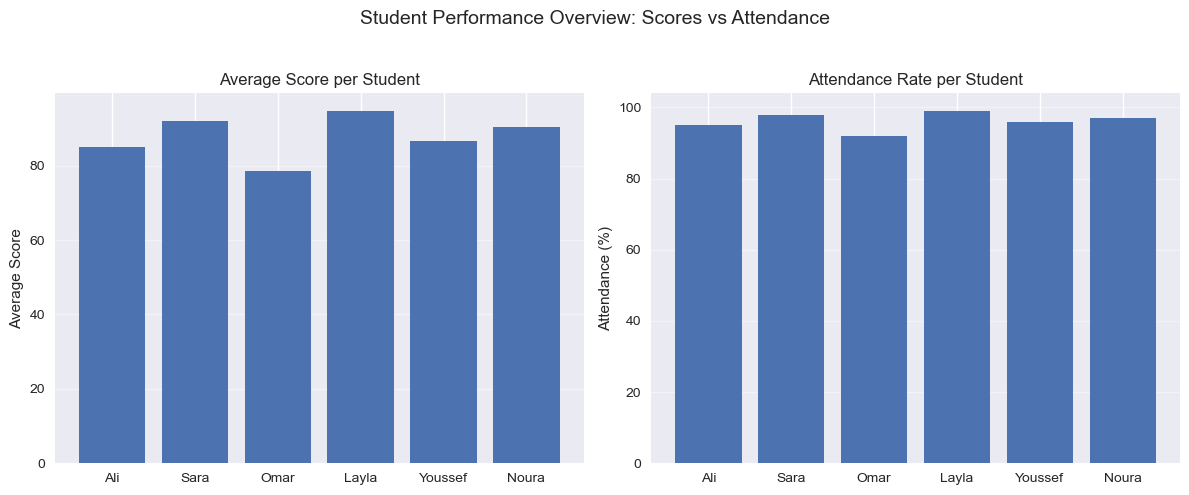

In [19]:
# -------------------------------------------------
# Step 1: Define the data
students = ['Ali', 'Sara', 'Omar', 'Layla', 'Youssef', 'Noura']
math_scores = np.array([85, 92, 78, 95, 88, 90])
science_scores = np.array([88, 94, 82, 96, 85, 92])
english_scores = np.array([82, 90, 76, 93, 87, 89])
attendance = np.array([95, 98, 92, 99, 96, 97])

average_scores = (math_scores + science_scores + english_scores) / 3

# -------------------------------------------------
# Step 2: Radar chart (per-student performance example: Layla)
subjects = ['Math', 'Science', 'English']
values = [math_scores[3], science_scores[3], english_scores[3]]
values += values[:1]

angles = np.linspace(0, 2*np.pi, len(subjects), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), subjects)
ax.set_title("Radar Chart: Layla's Performance")
plt.show()

# -------------------------------------------------
# Step 3: Grouped bar chart (subjects vs students)
x = np.arange(len(students))
width = 0.25

plt.figure(figsize=(10, 5))
plt.bar(x - width, math_scores, width, label='Math')
plt.bar(x, science_scores, width, label='Science')
plt.bar(x + width, english_scores, width, label='English')

plt.xticks(x, students)
plt.ylabel("Score")
plt.title("Student Scores by Subject")
plt.legend()
plt.grid(axis='y', alpha=0.4)
plt.show()

# -------------------------------------------------
# Step 4: Scatter plot (attendance vs average score)
plt.figure(figsize=(6, 5))
plt.scatter(attendance, average_scores, s=100)

for i, student in enumerate(students):
    plt.text(attendance[i] + 0.1, average_scores[i], student)

plt.xlabel("Attendance (%)")
plt.ylabel("Average Score")
plt.title("Attendance vs Average Academic Performance")
plt.grid(True)
plt.show()

# -------------------------------------------------
# Step 5: Composite visualization (storytelling dashboard)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Average score per student
axes[0].bar(students, average_scores)
axes[0].set_title("Average Score per Student")
axes[0].set_ylabel("Average Score")
axes[0].grid(axis='y', alpha=0.4)

# Right: Attendance comparison
axes[1].bar(students, attendance)
axes[1].set_title("Attendance Rate per Student")
axes[1].set_ylabel("Attendance (%)")
axes[1].grid(axis='y', alpha=0.4)

fig.suptitle("Student Performance Overview: Scores vs Attendance", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

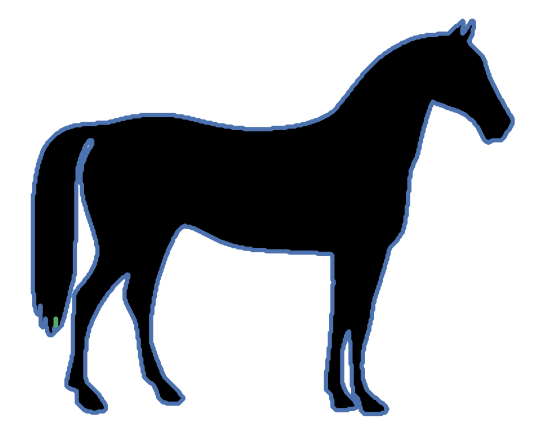

In [28]:
from skimage import measure, data
import matplotlib.pyplot as plt

# تحميل الصورة من مكتبة skimage
horse_image = data.horse()

# إيجاد الـ contours
contours = measure.find_contours(horse_image, 0.8)

# عرض الصورة مع الـ contours
plt.imshow(horse_image, cmap='gray')
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=3)

plt.axis('off')
plt.show()

In [ ]:
print(type(contours))
print(len(contours))
print(contours[0].shape)
print(contours[0][:5])  # أول 5 نقاط

<class 'list'>
2
(2645, 2)
[[312.  287.8]
 [311.8 288. ]
 [311.8 289. ]
 [311.8 290. ]
 [311.  290.8]]


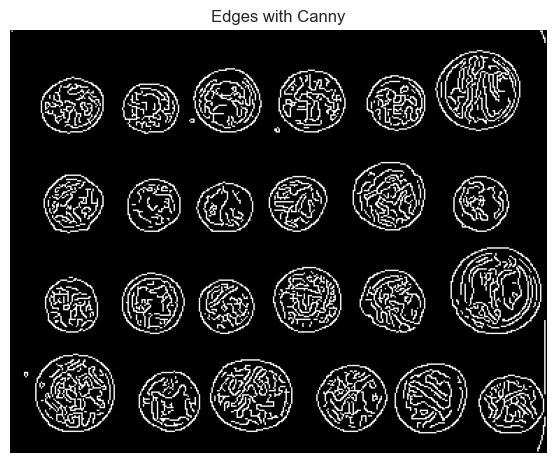

In [29]:
from skimage import data, color
from skimage.feature import canny
import matplotlib.pyplot as plt

# تحميل صورة coins من مكتبة skimage
coins = data.coins()

# ملاحظة: صورة coins أصلًا grayscale
# لكن نترك هذا السطر للتوضيح (غير ضروري هنا)
# coins_gray = color.rgb2gray(coins)

# تطبيق Canny Edge Detection
canny_edges = canny(coins)

# عرض النتيجة
plt.imshow(canny_edges, cmap='gray')
plt.title("Edges with Canny")
plt.axis('off')
plt.show()